In [11]:
#Python code for System of equations for pendulum problem
import sympy as sp

a, b, c = sp.symbols('a b c')


equations = [
    sp.Eq(a, 0),
    sp.Eq(b + c, 0),
    sp.Eq(-2*c, 1)
]

solution = sp.solve(equations, (a, b, c))


print("Solution:")
print("a =", solution[a])
print("b =", solution[b])
print("c =", solution[c])


Solution:
a = 0
b = 1/2
c = -1/2


In [12]:
#Period of the pendulm
import math

l_cm = 60
g = 9.8

l_m = l_cm / 100

tau = 2 * math.pi * math.sqrt(l_m / g)

print("Period of the pendulum:", tau, "seconds")

Period of the pendulum: 1.554685169343615 seconds


In [13]:
#System of equations for the frequency model for a string music instrument
import sympy as sp

alpha, a, b, c = sp.symbols('alpha a b c')

T, L, M = sp.symbols('T L M')
equation = sp.Eq(1/T, alpha * L**a * (M*L**-1)**b * (M*L*T**-2)**c)

eq1 = sp.Eq(-1, -2*c)
eq2 = sp.Eq(0, b + c)
eq3 = sp.Eq(0, a - b + c)

solutions = sp.solve((eq1, eq2, eq3), (a, b, c))

print("Solutions:")
print("a =", solutions[a])
print("b =", solutions[b])
print("c =", solutions[c])

Solutions:
a = -1
b = -1/2
c = 1/2


In [14]:
#Monthly mortgage payments
P = 550000
annual_interest_rate = 6.125
monthly_interest_rate = annual_interest_rate / 12 / 100
n = 30 * 12

x = (P * (1 + monthly_interest_rate)**n * monthly_interest_rate) / ((1 + monthly_interest_rate)**n - 1)

print("The monthly mortgage payment will approximately be: $", round(x, 2))

The monthly mortgage payment will approximately be: $ 3341.86


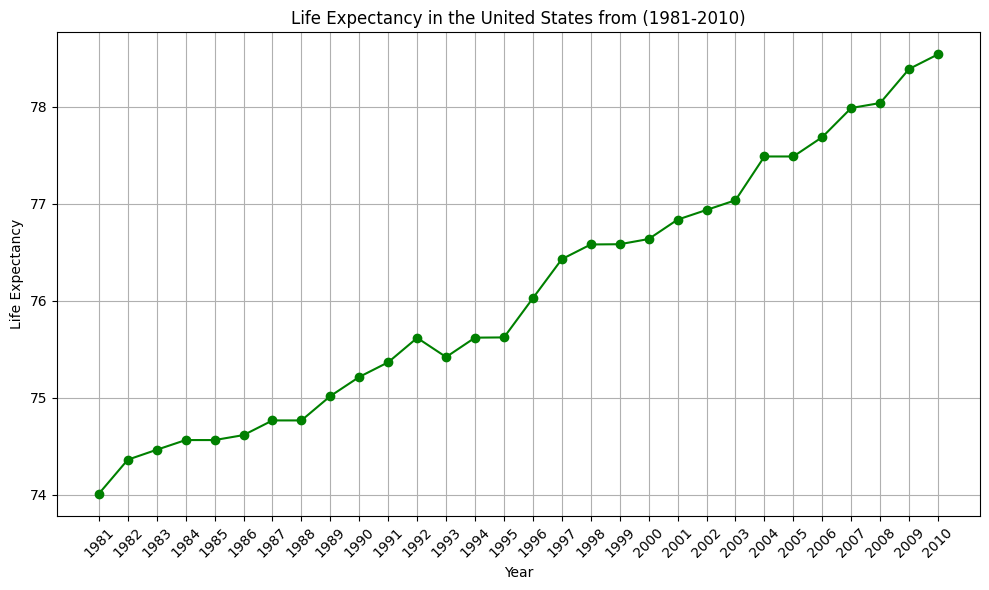

In [15]:
#Life Expectrancey in the US
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('LifeExpectancy19602020.csv')

us_data = df[df['Country Name'] == 'United States']
us_data = us_data.set_index('Country Name')
us_data = us_data.loc[:, '1981':'2010']

plt.figure(figsize=(10, 6))
plt.plot(us_data.columns, us_data.values.flatten(), marker='o', linestyle='-', color = 'g')
plt.title('Life Expectancy in the United States from (1981-2010)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

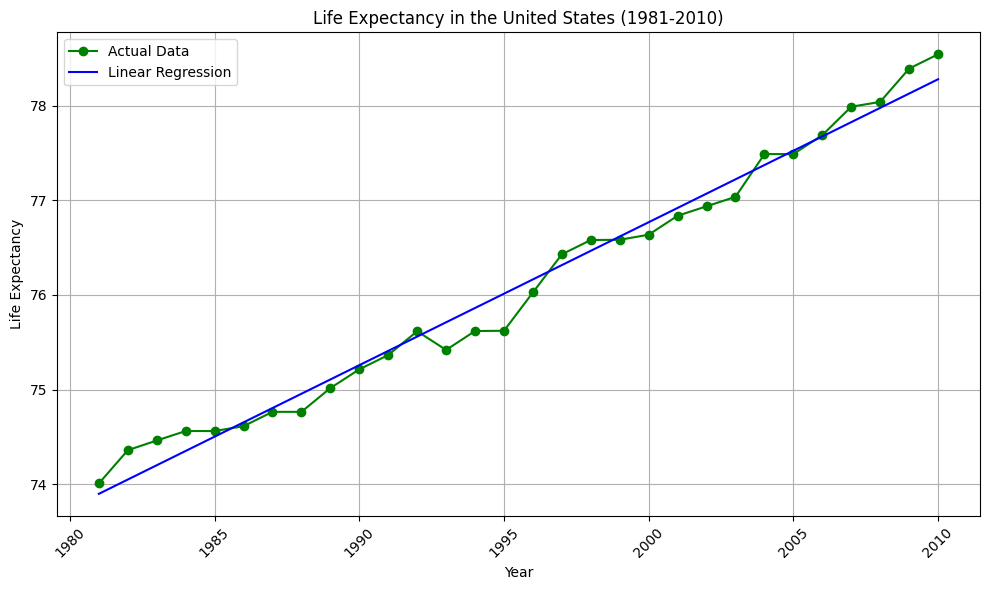

The change rate of life expectancy in the United States from 1981 to 2010 is: 1.51 years per decade


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('LifeExpectancy19602020.csv')

us_data = df[df['Country Name'] == 'United States']
us_data = us_data.set_index('Country Name')
us_data = us_data.loc[:, '1981':'2010']

years = np.array(us_data.columns, dtype=np.float64).reshape(-1, 1)
life_expectancy = us_data.values.flatten()

model = LinearRegression()
model.fit(years, life_expectancy)

rate_per_year = model.coef_[0]

rate_per_decade = rate_per_year * 10

predicted_life_expectancy = model.predict(years)

plt.figure(figsize=(10, 6))
plt.plot(years, life_expectancy, color='g', label='Actual Data', marker='o')
plt.plot(years, predicted_life_expectancy, color='b', label='Linear Regression')
plt.title('Life Expectancy in the United States (1981-2010)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("The change rate of life expectancy in the United States from 1981 to 2010 is: {:.2f} years per decade".format(rate_per_decade))

In [28]:
#Convert txt file to an Excel file
import pandas as pd

with open("EarthTemperatureData.txt", "r") as file:
    data = file.readlines()

formatted_data = []
for line in data:
    line = line.strip().split()
    formatted_data.append(line)


df = pd.DataFrame(formatted_data, columns=["YEAR", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC", "ANNUAL"])

df.to_excel("new_formatted_data.xlsx", index=False)
#There is a problem with this code where it adds new columns so I had to mannually go in there an remove them

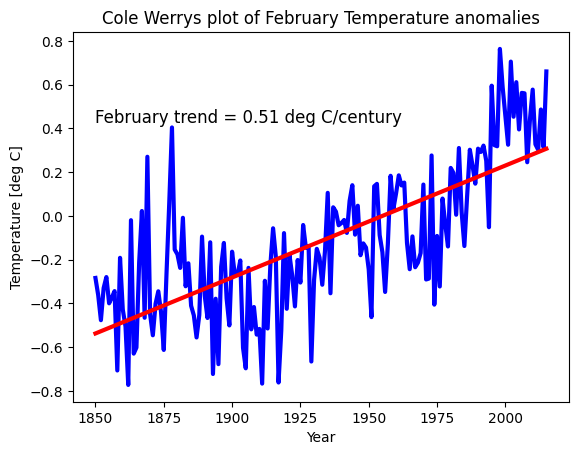

Linear Trend: 0.5117859789730507


In [29]:
#Plot for Feburary temperature anomalies
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

file_path = "new_formatted_data.xlsx"
data = pd.read_excel(file_path)

years = data['YEAR'].values.reshape(-1, 1)
february_temperatures = data['FEB'].values

centuries = (years - 1850) / 100

model = LinearRegression()

model.fit(centuries, february_temperatures)

predicted_february_temperatures = model.predict(centuries)

plt.plot(years, february_temperatures, color='blue', label='February Temperatures', linewidth=3)
plt.plot(years, predicted_february_temperatures, color='red', linewidth=3)

slope_text = f"February trend = {model.coef_[0]:.2f} deg C/century"
plt.text(1850, min(february_temperatures) + 1.2, slope_text, fontsize=12, color='black', ha='left')

plt.xlabel('Year')
plt.ylabel('Temperature [deg C]')
plt.title('Cole Werrys plot of February Temperature anomalies')

plt.show()

print("Linear Trend:", model.coef_[0])

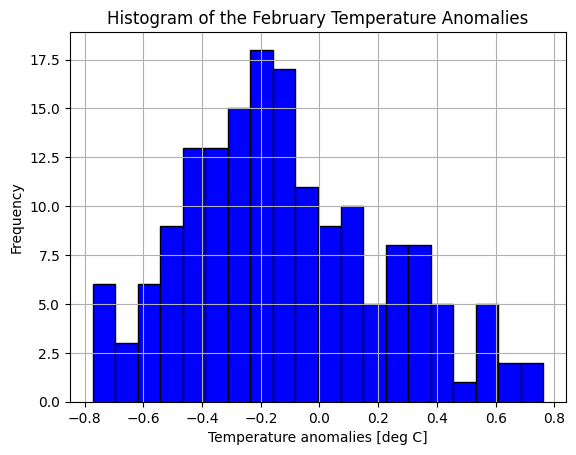

In [30]:
#Histogram plot
import pandas as pd
import matplotlib.pyplot as plt

file_path = "new_formatted_data.xlsx"
data = pd.read_excel(file_path)

february_temperatures = data['FEB'].values

plt.hist(february_temperatures, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of the February Temperature Anomalies')
plt.xlabel('Temperature anomalies [deg C]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()